# Here is a python script for working with data cubes from radio observations 

# Solution for Part-1
## We load the two datasets and plot the integrated intensity map for the two fits file. 

Spectral Interpolate:   0%|          | 0/282735 [00:00<?, ?it/s]

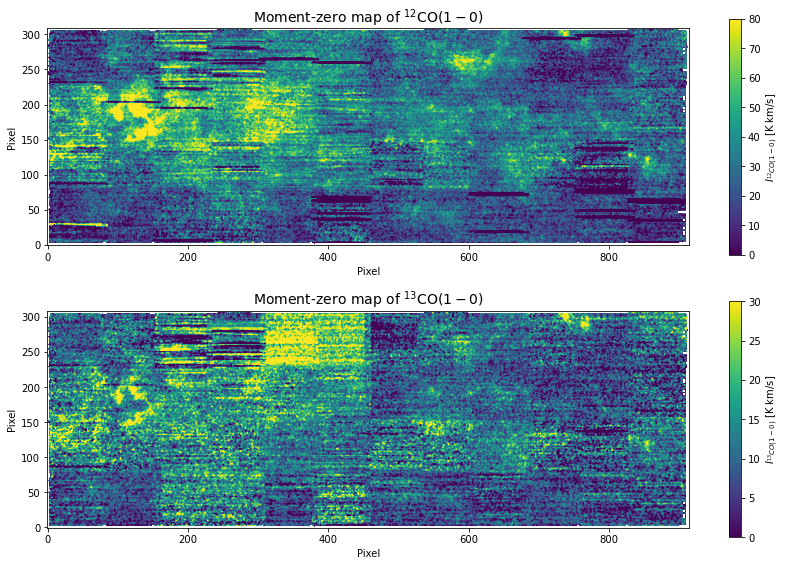

In [6]:
from spectral_cube import SpectralCube
import astropy.units as u
import matplotlib.pyplot as plt

# Load FITS cubes
cube_12co = SpectralCube.read("dr6.s300.12co.fits.gz").with_spectral_unit(u.km/u.s)
cube_13co = SpectralCube.read("dr6.s300.13co.fits.gz").with_spectral_unit(u.km/u.s)

# Allow huge operations
cube_13co.allow_huge_operations = True
cube_12co.allow_huge_operations = True

# Interpolate 12CO onto 13CO grid
cube_12co_interp = cube_12co.spectral_interpolate(cube_13co.spectral_axis)

# Compute moment-0 maps
moment0_12co = cube_12co_interp.moment(order=0)
moment0_13co = cube_13co.moment(order=0)

# Plot stacked moment-zero maps
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 12CO map
im1 = axes[0].imshow(moment0_12co.value, origin='lower', cmap='viridis', 
                     vmin=0, vmax=80)
axes[0].set_title(r'Moment-zero map of ${}^{12}\mathrm{CO}(1-0)$', fontsize=14)
cbar1 = plt.colorbar(im1, ax=axes[0], orientation='vertical')
cbar1.set_label(r'$I_{{{}^{12}CO(1-0)}}$ [K km/s]')

# 13CO map
im2 = axes[1].imshow(moment0_13co.value, origin='lower', cmap='viridis', 
                     vmin=0, vmax=30)
axes[1].set_title(r'Moment-zero map of ${}^{13}\mathrm{CO}(1-0)$', fontsize=14)
cbar2 = plt.colorbar(im2, ax=axes[1], orientation='vertical')
cbar2.set_label(r'$I_{{{}^{13}CO(1-0)}}$ [K km/s]')

# Common formatting
for ax in axes:
    ax.set_xlabel('Pixel')
    ax.set_ylabel('Pixel')

plt.tight_layout()
plt.show()


### $\rightarrow$ In the plots above for $^{12}$CO(1-0) and $^{13}$CO(1-0), we can clearly observe that the regions where we have high emission for $^{12}$CO we have the emission for $^1{3}$CO, in the surrounding parts of the $^{12}$CO emisson. 
### $\rightarrow$ If for example we refer to the point (150,200) on the $^{12}$CO map we can observe the emission at aroung the outer region of $^{13}$CO emission. 
### $\rightarrow$ Then for some resions the emissions are not visible in $^{12}$CO but the visible in $^{13}$CO and vice-versa, for example (400,250) we have emission in $^{13}$CO but not in $^{12}$CO.

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
# Solution for Part-2
## We not create the mask for the data cube using the hint given in the exercise sheet. But in the codes below first we show the plot for the case where we calculated the noise and kept a threshold of 3$\sigma$. In part 2 we have a high and low threshold between 4 and 2 $\sigma$ values. 

Spectral Interpolate:   0%|          | 0/282735 [00:00<?, ?it/s]

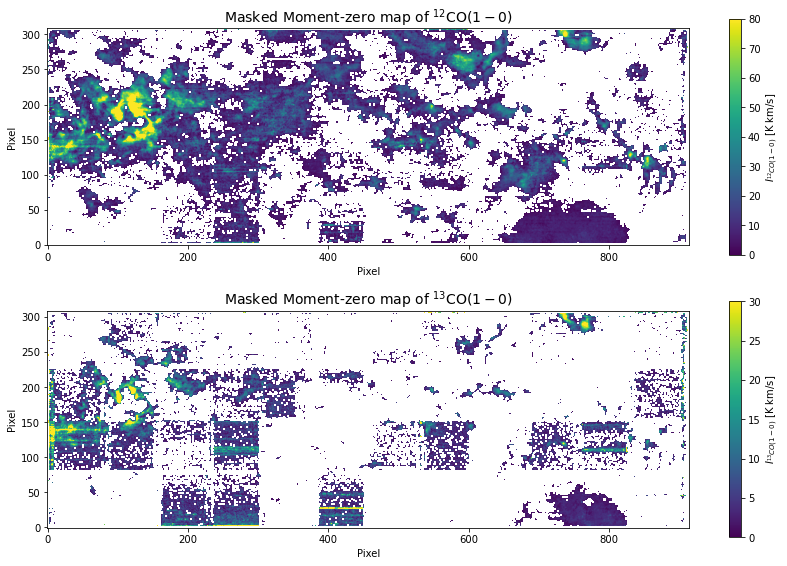

In [9]:
from spectral_cube import SpectralCube
import astropy.units as u
import matplotlib.pyplot as plt

# Load FITS cubes
cube_12co = SpectralCube.read("dr6.s300.12co.fits.gz").with_spectral_unit(u.km/u.s)
cube_13co = SpectralCube.read("dr6.s300.13co.fits.gz").with_spectral_unit(u.km/u.s)

# Allow huge operations
cube_13co.allow_huge_operations = True
cube_12co.allow_huge_operations = True

# Interpolate 12CO onto 13CO grid
cube_12co_interp = cube_12co.spectral_interpolate(cube_13co.spectral_axis)

# Estimate noise using cube standard deviation (better to select emission-free region in practice)
noise_12co = cube_12co_interp.std().value
noise_13co = cube_13co.std().value

# Define 3-sigma thresholds
threshold_12co = 3 * noise_12co
threshold_13co = 3 * noise_13co

# Apply masks: keep values above threshold
masked_cube_12co = cube_12co_interp.with_mask(cube_12co_interp > threshold_12co * u.K)
masked_cube_13co = cube_13co.with_mask(cube_13co > threshold_13co * u.K)

# Compute moment-0 maps on masked cubes
moment0_masked_12co = masked_cube_12co.moment(order=0)
moment0_masked_13co = masked_cube_13co.moment(order=0)

# Plot stacked, masked moment-zero maps
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 12CO masked map
im1 = axes[0].imshow(moment0_masked_12co.value, origin='lower', cmap='viridis', 
                     vmin=0, vmax=80)
axes[0].set_title(r'Masked Moment-zero map of ${}^{12}\mathrm{CO}(1-0)$', fontsize=14)
cbar1 = plt.colorbar(im1, ax=axes[0], orientation='vertical')
cbar1.set_label(r'$I_{{{}^{12}CO(1-0)}}$ [K km/s]')

# 13CO masked map
im2 = axes[1].imshow(moment0_masked_13co.value, origin='lower', cmap='viridis', 
                     vmin=0, vmax=30)
axes[1].set_title(r'Masked Moment-zero map of ${}^{13}\mathrm{CO}(1-0)$', fontsize=14)
cbar2 = plt.colorbar(im2, ax=axes[1], orientation='vertical')
cbar2.set_label(r'$I_{{{}^{13}CO(1-0)}}$ [K km/s]')

# Common formatting
for ax in axes:
    ax.set_xlabel('Pixel')
    ax.set_ylabel('Pixel')

plt.tight_layout()
plt.show()


Spectral Interpolate:   0%|          | 0/282735 [00:00<?, ?it/s]

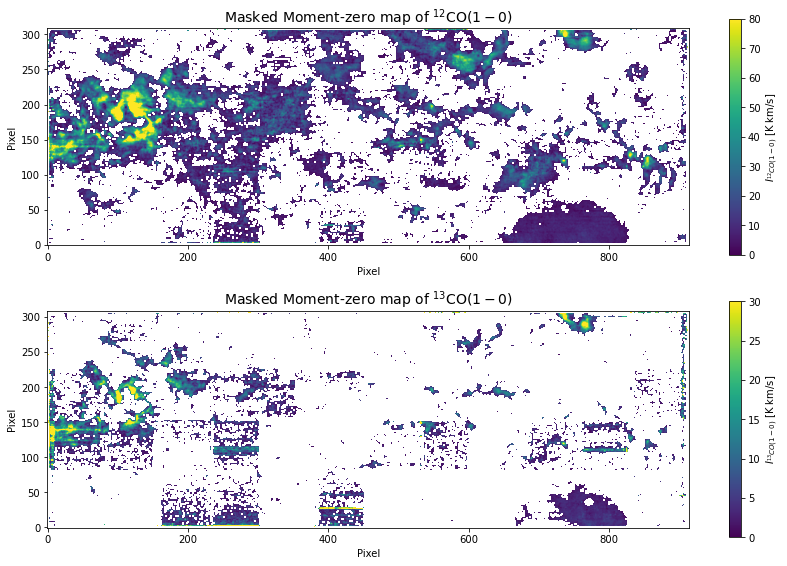

In [ ]:
from spectral_cube import SpectralCube
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import binary_dilation

# Load cubes
cube_12co = SpectralCube.read("dr6.s300.12co.fits.gz").with_spectral_unit(u.km/u.s)
cube_13co = SpectralCube.read("dr6.s300.13co.fits.gz").with_spectral_unit(u.km/u.s)

cube_12co.allow_huge_operations = True
cube_13co.allow_huge_operations = True

# Interpolate 12CO cube onto 13CO's spectral grid
cube_12co_interp = cube_12co.spectral_interpolate(cube_13co.spectral_axis)

# Compute sigma_rms from line-free channels (use first and last 5 channels)
line_free_12co_data = np.concatenate((
    cube_12co_interp[:5].unmasked_data[:].value,
    cube_12co_interp[-5:].unmasked_data[:].value
), axis=0)

line_free_13co_data = np.concatenate((
    cube_13co[:5].unmasked_data[:].value,
    cube_13co[-5:].unmasked_data[:].value
), axis=0)

# Calculate sigma_rms
sigma_12co = np.nanstd(line_free_12co_data)
sigma_13co = np.nanstd(line_free_13co_data)

# Define thresholds for masking
high_thresh_12co = 4 * sigma_12co
low_thresh_12co = 2 * sigma_12co

high_thresh_13co = 4 * sigma_13co
low_thresh_13co = 2 * sigma_13co

# Create masks (as numpy arrays)
mask_12co_high = cube_12co_interp.unmasked_data[:].value > high_thresh_12co
mask_13co_high = cube_13co.unmasked_data[:].value > high_thresh_13co

# Dilate masks to connect nearby significant pixels
dilated_mask_12co = binary_dilation(mask_12co_high)
dilated_mask_13co = binary_dilation(mask_13co_high)

# Final mask: include pixels above low threshold AND within dilated region
final_mask_12co = (cube_12co_interp.unmasked_data[:].value > low_thresh_12co) & dilated_mask_12co
final_mask_13co = (cube_13co.unmasked_data[:].value > low_thresh_13co) & dilated_mask_13co

# Apply masks to cubes (create new cubes with applied masks)
masked_cube_12co = cube_12co_interp.with_mask(final_mask_12co)
masked_cube_13co = cube_13co.with_mask(final_mask_13co)

# Compute moment-0 (integrated intensity) maps
moment0_12co = masked_cube_12co.moment(order=0)
moment0_13co = masked_cube_13co.moment(order=0)

# Plot the maps
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 12CO moment-0 map
im1 = axes[0].imshow(moment0_12co.value, origin='lower', cmap='viridis', vmin=0, vmax=80)
axes[0].set_title(r'Masked Moment-zero map of ${}^{12}\mathrm{CO}(1-0)$', fontsize=14)
cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label(r'$I_{{{}^{12}CO(1-0)}}$ [K km/s]')

# 13CO moment-0 map
im2 = axes[1].imshow(moment0_13co.value, origin='lower', cmap='viridis', vmin=0, vmax=30)
axes[1].set_title(r'Masked Moment-zero map of ${}^{13}\mathrm{CO}(1-0)$', fontsize=14)
cbar2 = plt.colorbar(im2, ax=axes[1])
cbar2.set_label(r'$I_{{{}^{13}CO(1-0)}}$ [K km/s]')

# Axis labels
for ax in axes:
    ax.set_xlabel('Pixel')
    ax.set_ylabel('Pixel')

plt.tight_layout()
plt.show()


### $\rightarrow$ In the above two cases we observe that some region of $^{13}$CO, is not extracted very properly even after aplying the two threshold techniques, we would like to discuss this during the tutorial maybe to explore ways of getting the entire emission of $^{13}$CO correctly. 
_____________________________

# Solution for Part-3
## $\rightarrow$ For getting the T$_{ex}$, we use the assumption that we have local thermodynamic equilibrium, we have optically thin emission for $^{12}$CO, we have background emission from CMB, and have a beam filling factor of 1. 
## $\rightarrow$ The formula used is: 
$$
T_{ex} = \frac{5.53}{ln \left( 1+\frac{5.53}{T_{peak} +0.819} \right)} \\
\frac{h \nu }{k} \rightarrow 5.53 k \\
J(T_{CMB}) \rightarrow 0.819 at 2.73K
$$

C:\Users\ASUS\anaconda3\lib\site-packages\spectral_cube\spectral_cube.py:534: RuntimeWarning: All-NaN slice encountered
  result = function(np.dstack((result, plane)), axis=2, **kwargs)


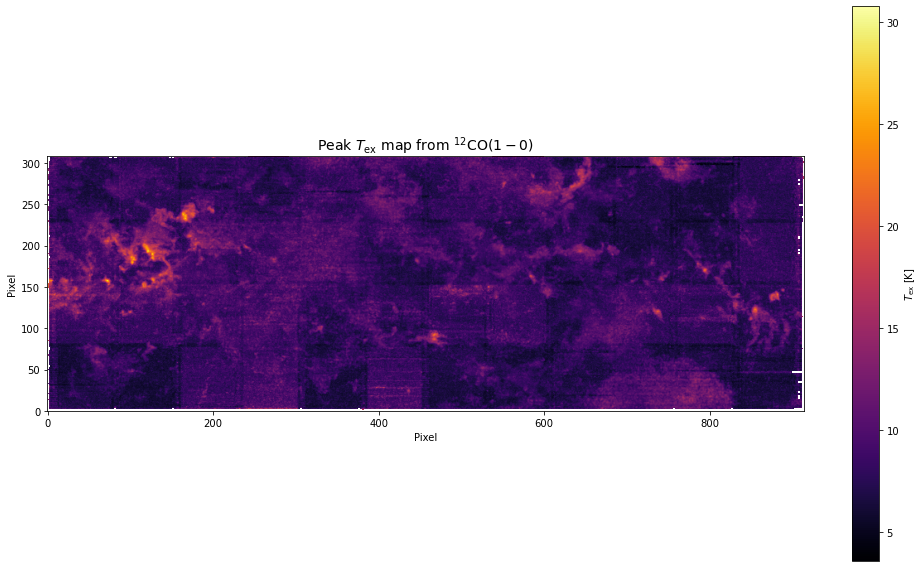

In [12]:
from spectral_cube import SpectralCube
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

# Load 12CO cube
cube_12co = SpectralCube.read("dr6.s300.12co.fits.gz").with_spectral_unit(u.km/u.s)
cube_12co.allow_huge_operations = True

# Compute T_peak (max along velocity axis)
T_peak = cube_12co.max(axis=0)

# Convert to excitation temperature using the Rayleigh-Jeans approx and LTE assumptions
T_cmb = 2.73  # CMB temperature in K
hnu_k = 5.53  # hν/k for 12CO(1-0)

# J(T_cmb)
J_cmb = hnu_k / (np.exp(hnu_k / T_cmb) - 1)

# Excitation temperature formula
Tex = hnu_k / np.log(1 + (hnu_k / (T_peak.value + J_cmb)))

# Plot T_ex map
plt.figure(figsize=(14, 8))
im = plt.imshow(Tex, origin='lower', cmap='inferno')
plt.title(r'Peak $T_{\mathrm{ex}}$ map from ${}^{12}\mathrm{CO}(1-0)$', fontsize=14)
cbar = plt.colorbar(im)
cbar.set_label(r'$T_{\mathrm{ex}}$ [K]')
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.tight_layout()
plt.show()


### $\rightarrow$ We can clearly observe that where we mentioned that the emission is higehr than the other parts their the temperature is also higher than the other regeions. 
____________________

# Solution for Part-4
## $\rightarrow$ As suggested in the hint we used the formula used for opacity:
$$
\tau_{0}^{13} = -ln \left[ 1 - \frac{T_B^{13}}{5.3} \times \left( { \left[exp(\frac{5.3}{T}) - 1 \right]^{-1} - 0.16 } \right) ^{-1}\right]
$$
## $\rightarrow$ In the first code we do not apply any mask we just plot the opacity that we computed but in the code that is presented after this gives a masked case in which we mask the invalid and the non-physical data points. 
## $\rightarrow$ We also present a histogram to see distribution of peak values of opacity.

Spectral Interpolate:   0%|          | 0/282735 [00:00<?, ?it/s]

C:\Users\ASUS\anaconda3\lib\site-packages\spectral_cube\spectral_cube.py:436: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
C:\Users\ASUS\AppData\Local\Temp/ipykernel_12524/3662532216.py:33: RuntimeWarning: overflow encountered in exp
  1 - (Tb_slice / 5.3) / ((1 / (np.exp(term) - 1)) - 0.16)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_12524/3662532216.py:32: RuntimeWarning: invalid value encountered in log
  tau_13_cube[i, :, :] = -np.log(
C:\Users\ASUS\AppData\Local\Temp/ipykernel_12524/3662532216.py:32: RuntimeWarning: divide by zero encountered in log
  tau_13_cube[i, :, :] = -np.log(


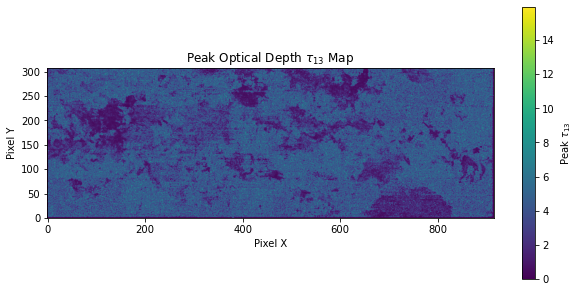

In [15]:
import numpy as np
from spectral_cube import SpectralCube
import astropy.units as u
import matplotlib.pyplot as plt

# Load cubes (use your correct file paths)
cube_12co = SpectralCube.read("dr6.s300.12co.fits.gz").with_spectral_unit(u.km/u.s)
cube_13co = SpectralCube.read("dr6.s300.13co.fits.gz").with_spectral_unit(u.km/u.s)

cube_12co.allow_huge_operations = True
cube_13co.allow_huge_operations = True

# Interpolate 12CO onto 13CO's spectral grid
cube_12co_interp = cube_12co.spectral_interpolate(cube_13co.spectral_axis)

# Extract Tex from 12CO peak along spectral axis
Tex_map = cube_12co_interp.max(axis=0).to(u.K).value

# Extract 13CO cube data in K
Tb_13co = cube_13co.unmasked_data[:].value  # (velocity, y, x)

# Create an empty tau_13 cube of the same shape
tau_13_cube = np.zeros_like(Tb_13co)

# Avoid division by zero
Tex_map_safe = np.where(Tex_map > 0, Tex_map, np.nan)

# Apply the formula voxel-wise
for i in range(Tb_13co.shape[0]):
    Tb_slice = Tb_13co[i, :, :]
    term = (5.3 / Tex_map_safe)
    tau_13_cube[i, :, :] = -np.log(
        1 - (Tb_slice / 5.3) / ((1 / (np.exp(term) - 1)) - 0.16)
    )

# Mask invalid or non-finite values
tau_13_cube = np.where(np.isfinite(tau_13_cube), tau_13_cube, 0)

# Peak tau_13 map
peak_tau_13_map = np.nanmax(tau_13_cube, axis=0)

# Plotting
plt.figure(figsize=(10, 5))
plt.imshow(peak_tau_13_map, origin='lower', cmap='viridis')
plt.colorbar(label=r'Peak $\tau_{13}$')
plt.title(r'Peak Optical Depth $\tau_{13}$ Map')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()


T0 = 5.29 K


C:\Users\ASUS\AppData\Local\Temp/ipykernel_12524/1530194014.py:36: RuntimeWarning: All-NaN slice encountered
  peak_tau_13 = np.nanmax(tau_13_cube, axis=0)


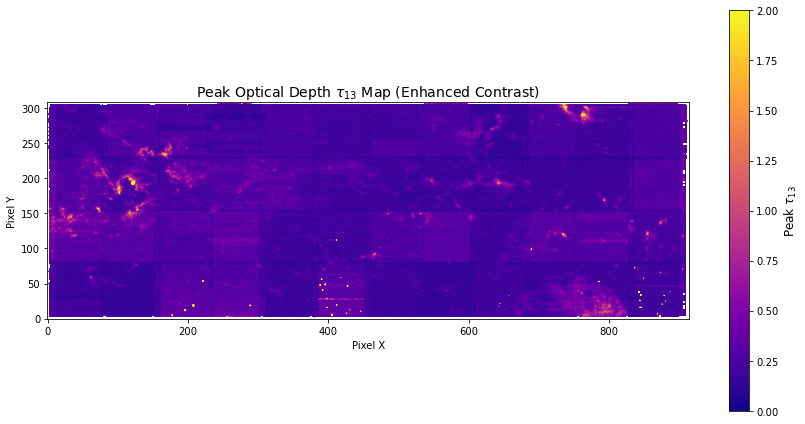

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from spectral_cube import SpectralCube

# Load 13CO cube
cube_13co = SpectralCube.read('dr6.s300.13co.fits.gz')

# Assumed excitation temperature from your part 2 result (example: 15 K)
Tex = 15.0  # replace with your derived value if needed

# Convert cube to brightness temperature numpy array
Tb_13co = cube_13co.filled_data[:].value  # (n_channels, ny, nx)

# Constants
h = 6.626e-34  # Planck constant (J.s)
k = 1.381e-23  # Boltzmann constant (J/K)
freq = 110.201e9  # 13CO(1-0) frequency in Hz
T0 = (h * freq) / k  # in K, should be around 5.3K
print(f"T0 = {T0:.2f} K")  # just to check it matches 5.3 K

# Precompute terms
exp_term = np.exp(T0 / Tex)
denom = (1 / (exp_term - 1)) - 0.16

# Avoid non-physical values
denom = np.where(denom == 0, 1e-10, denom)

# Calculate tau_13 cube safely
inside_log = 1 - (Tb_13co / T0) / denom
inside_log = np.where(inside_log <= 0, 1e-10, inside_log)  # avoid log(0)

tau_13_cube = -np.log(inside_log)

# Compute peak tau_13 map (max along velocity axis)
peak_tau_13 = np.nanmax(tau_13_cube, axis=0)

# Plot the Peak τ_13 map
plt.figure(figsize=(12, 6))
im = plt.imshow(peak_tau_13, origin='lower', cmap='plasma', vmin=0, vmax=2)
cbar = plt.colorbar(im)
cbar.set_label(r'Peak $\tau_{13}$', fontsize=12)
plt.title(r'Peak Optical Depth $\tau_{13}$ Map (Enhanced Contrast)', fontsize=14)
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.tight_layout()
plt.show()


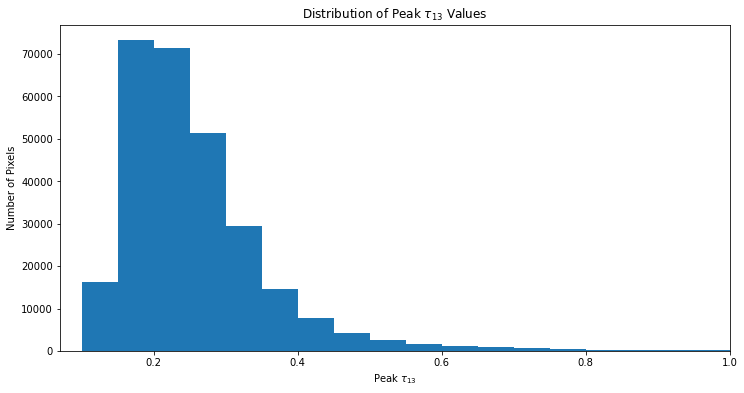

In [34]:
plt.figure(figsize=(12, 6))

plt.hist(peak_tau_13.flatten(), bins=100, range=(0, 5))
plt.xlabel(r'Peak $\tau_{13}$')
plt.ylabel('Number of Pixels')
plt.title(r'Distribution of Peak $\tau_{13}$ Values')
plt.xlim(0.07,1)
plt.show()


# Using the masked code we can better visualize the regions with higher emission and can better correlate the opacity values on the colorbar
__________________________________________

# Solution for Part-5
## $\rightarrow$ For computing the N$_{tot}$ we use the following equation: 
$$
N(total)_{CO}^{13} = 3 \times 10^{14} \frac{T \int{\tau^{13} (\nu) d\nu }}{ 1 - exp(\frac{-5.3}{T})}
$$

## $\rightarrow$ We again show two plots in the first one we calculate the N$_{tot}$ and show it with respect to the colorbar, nut in the next plot we have the cleaned plot for better visualization in the plot that is cleaned we its ideal for relating the values on the color bar with the visual regions with higher emissivity. 

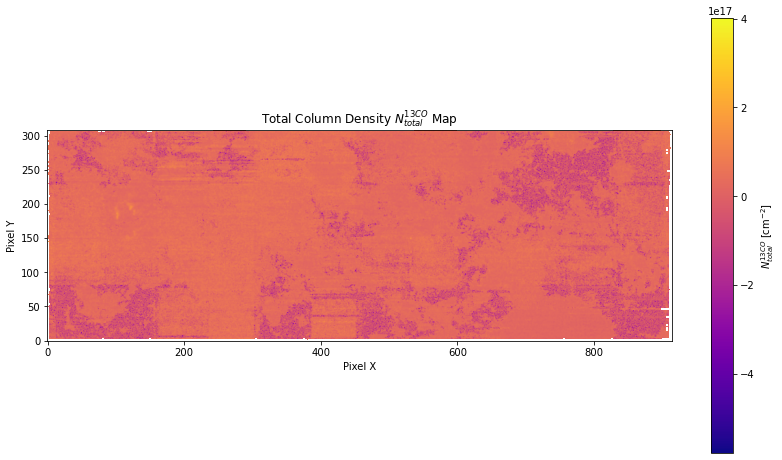

In [20]:
# Now compute N(total)_13CO from the equation 15.36

# Integral of tau_13 over velocity axis (assuming dv is constant)
dv = np.abs(cube_13co.spectral_axis[1] - cube_13co.spectral_axis[0]).value  # in km/s
integrated_tau13 = np.nansum(tau_13_cube, axis=0) * dv  # unit: dimensionless * km/s

# Compute N(total)
T_safe = np.where(Tex_map > 0, Tex_map, np.nan)
Ntot_13CO = 3.0e14 * T_safe * integrated_tau13 / (1 - np.exp(-5.3 / T_safe))  # in cm^-2

# Plot integrated Ntot map
plt.figure(figsize=(14, 8))
plt.imshow(Ntot_13CO, origin='lower', cmap='plasma')
plt.colorbar(label=r'$N_{total}^{13CO}$ [cm$^{-2}$]')
plt.title(r'Total Column Density $N_{total}^{13CO}$ Map')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()


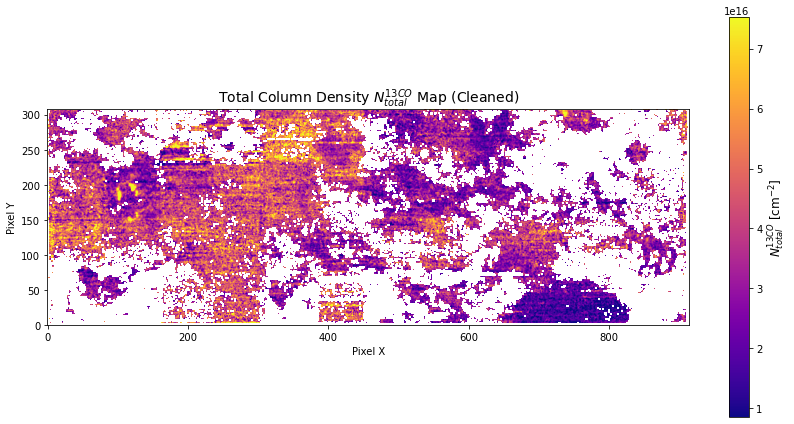

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Mask out invalid or negative values (column density cannot be negative)
Ntot_13CO_masked = np.where(Ntot_13CO > 0, Ntot_13CO, np.nan)

# Get reasonable vmin and vmax based on percentiles to suppress outliers
vmin = np.nanpercentile(Ntot_13CO_masked, 5)
vmax = np.nanpercentile(Ntot_13CO_masked, 99)

# Plot with improved color scaling
plt.figure(figsize=(12, 6))
im = plt.imshow(Ntot_13CO_masked, origin='lower', cmap='plasma', vmin=vmin, vmax=vmax)
cbar = plt.colorbar(im)
cbar.set_label(r'$N_{total}^{13CO}$ [cm$^{-2}$]', fontsize=12)
plt.title(r'Total Column Density $N_{total}^{13CO}$ Map (Cleaned)', fontsize=14)
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.tight_layout()
plt.show()
